In [26]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Carregar a base de dados
df = pd.read_csv('data_game.csv')
df= df.head(500)

# Filtragem: Selecionar apenas as colunas 'Name' e 'Genre'
df_filtered = df[['Name', 'Genre']].dropna()

# Criar o grafo vazio
G = nx.Graph()

# Adicionar nós ao grafo para cada jogo
G.add_nodes_from(df_filtered['Name'])

# Criar arestas entre jogos que compartilham o mesmo gênero
for genre, group in df_filtered.groupby('Genre'):
    for game1, game2 in combinations(group['Name'], 2):
        G.add_edge(game1, game2)

print("O grafo é conectado?", nx.is_connected(G))

# Verificar componentes
components = list(nx.connected_components(G))
print(f"Número de componentes conectados: {len(components)}")

for i, component in enumerate(components):
    G_component = G.subgraph(component).copy()
    num_nos = G_component.number_of_nodes()
    num_arestas = G_component.number_of_edges()
    densidade = nx.density(G_component)
    clustering_medio = nx.average_clustering(G_component)
    assortatividade = nx.degree_assortativity_coefficient(G_component)
    
    # Centralidade (Top 5)
    betweenness = sorted(nx.betweenness_centrality(G_component).items(), key=lambda x: x[1], reverse=True)[:5]
    closeness = sorted(nx.closeness_centrality(G_component).items(), key=lambda x: x[1], reverse=True)[:5]

    # Número de comunidades
    comunidades = list(nx.community.greedy_modularity_communities(G_component))
    num_comunidades = len(comunidades)

    # Exibir resultados para cada componente
    print(f"\nAnálise do Componente {i + 1}:")
    print(f"Número de nós: {num_nos}")
    print(f"Número de arestas: {num_arestas}")
    print(f"Densidade: {densidade:.4f}")
    print(f"Coeficiente de Clustering Médio: {clustering_medio:.4f}")
    print(f"Assortatividade: {assortatividade:.4f}")
    print(f"Número de comunidades: {num_comunidades}")
    print("---------------------------------------------------------------------------------")
    print("Top 5 Betweenness Centrality:")
    for node, value in betweenness:
        print(f"{node}: {value:.4f}")
    print("---------------------------------------------------------------------------------")
    print("Top 5 Closeness Centrality:")
    for node, value in closeness:
        print(f"{node}: {value:.4f}")



O grafo é conectado? False
Número de componentes conectados: 12

Análise do Componente 1:
Número de nós: 49
Número de arestas: 1183
Densidade: 1.0060
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0030
Número de comunidades: 8
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Kinect Sports: 0.0000
FIFA Soccer 07: 0.0000
Madden NFL 16: 0.0000
FIFA 16: 0.0000
FIFA Soccer 11: 0.0000
---------------------------------------------------------------------------------
Top 5 Closeness Centrality:
Kinect Sports: 1.0000
FIFA Soccer 07: 1.0000
Madden NFL 16: 1.0000
FIFA 16: 1.0000
FIFA Soccer 11: 1.0000

Análise do Componente 2:
Número de nós: 52
Número de arestas: 1331
Densidade: 1.0038
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0019
Número de comunidades: 6
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Croc: Legend of the Gobbos: 0.0000
Don

c:\Users\Usuário\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))



Análise do Componente 3:
Número de nós: 33
Número de arestas: 528
Densidade: 1.0000
Coeficiente de Clustering Médio: 1.0000
Assortatividade: nan
Número de comunidades: 1
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Midnight Club 3: DUB Edition: 0.0000
Mario Kart 7: 0.0000
Gran Turismo 6: 0.0000
Wave Race 64: 0.0000
Gran Turismo 4: 0.0000
---------------------------------------------------------------------------------
Top 5 Closeness Centrality:
Midnight Club 3: DUB Edition: 1.0000
Mario Kart 7: 1.0000
Gran Turismo 6: 1.0000
Wave Race 64: 1.0000
Gran Turismo 4: 1.0000

Análise do Componente 4:
Número de nós: 53
Número de arestas: 1383
Densidade: 1.0036
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0018
Número de comunidades: 6
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Crisis Core: Final Fantasy VII: 0.0000
Pokémon Yellow: Special Pikach

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
# Selecionando as 100 primeiras linhas para uma análise
df = df.head(100)

# Filtragem e preparação dos dados
df_genre = df[['Name', 'Genre']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_genres = set()

# Adicionar gêneros ao conjunto
for genres in df_genre['Genre'].str.split(','):
    genres = [genre.strip() for genre in genres]  # Remover espaços em branco
    unique_genres.update(genres)

# Imprimir gêneros únicos
print("Gêneros únicos no dataset:")
for genre in unique_genres:
    print(genre)

number_genres = len(unique_genres)
print(f'Número de gêneros: {number_genres}')

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos gêneros
for _, row in df_genre.iterrows():
    game = row['Name']
    genres = [genre.strip() for genre in row['Genre'].split(',')]  # Dividir múltiplos gêneros
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, genres=genres)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um gênero
    for genre in genres:
        for other_game, other_row in df_genre.iterrows():
            if game != other_row['Name'] and genre in [gen.strip() for gen in other_row['Genre'].split(',')]:
                G.add_edge(game, other_row['Name'], genre=genre)

# Desenhar o grafo
#pos = nx.spring_layout(G, k=0.5, iterations=50)
#plt.figure(figsize=(10, 10))
#nx.draw(G, pos, with_labels=False, node_size=60, font_size=8)  # Retirando os names dos nós para melhor visualização
#plt.title("Genres Network")
#plt.show()

# Verificando o número de componentes
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

# Printar os nomes dos componentes e a quantidade de nós que cada um possui
components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    print(f"Quantidade de jogos: {len(component)}")
    print(f"Jogos no componente: {', '.join(component)}\n")


Gêneros únicos no dataset:
Shooter
Simulation
Puzzle
Misc
Adventure
Sports
Action
Platform
Fighting
Role-Playing
Racing
Número de gêneros: 11
Número de componentes: 11
Componente 1:
Quantidade de jogos: 7
Jogos no componente: Mario & Sonic at the Olympic Games, Wii Fit Plus, FIFA 17, Wii Sports, FIFA 16, Wii Sports Resort, Wii Fit

Componente 2:
Quantidade de jogos: 15
Jogos no componente: Super Mario All-Stars, Super Mario Galaxy 2, New Super Mario Bros. Wii, New Super Mario Bros. 2, Super Mario Galaxy, Super Mario Bros. 2, Super Mario Bros., Super Mario Land, Super Mario 64, Super Mario 3D Land, New Super Mario Bros., Donkey Kong Country, Crash Bandicoot 2: Cortex Strikes Back, Super Mario Bros. 3, Super Mario World

Componente 3:
Quantidade de jogos: 10
Jogos no componente: Gran Turismo 4, Mario Kart Wii, Super Mario Kart, Gran Turismo, Gran Turismo 5, Gran Turismo 3: A-Spec, Gran Turismo 2, Mario Kart 7, Mario Kart 64, Mario Kart DS

Componente 4:
Quantidade de jogos: 15
Jogos no c

In [10]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')



Nós da rede: ['Wii Sports', 'Wii Sports Resort', 'Wii Fit', 'Wii Fit Plus', 'FIFA 16', 'Mario & Sonic at the Olympic Games', 'FIFA 17', 'Zumba Fitness', 'FIFA 12', 'FIFA 14', 'Kinect Sports', 'FIFA 15', 'Madden NFL 2004', 'FIFA Soccer 11', "Tony Hawk's Pro Skater", 'Madden NFL 06', "Tony Hawk's Pro Skater 2", 'Mario & Sonic at the Olympic Winter Games', 'Madden NFL 2005', 'Madden NFL 07', "Tony Hawk's Pro Skater 3", 'Winning Eleven: Pro Evolution Soccer 2007', 'FIFA Soccer 06', 'Madden NFL 2003', 'FIFA Soccer 07', 'World Soccer Winning Eleven 9', 'Golf', 'EA Sports Active', "Tony Hawk's Underground", 'NBA 2K16', 'World Soccer Winning Eleven 8 International', 'Sports Champions', 'Mario & Sonic at the London 2012 Olympic Games', 'FIFA Soccer 2005', "Tony Hawk's Pro Skater 4", 'Pro Evolution Soccer 2008', 'FIFA Soccer 10', 'FIFA Soccer 2004', 'FIFA Soccer 2003', 'Madden NFL 16', 'Baseball', 'FIFA Soccer 08', 'Madden NFL 2002', 'World Class Track Meet', 'WWE SmackDown! Shut Your Mouth', 'N

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari']


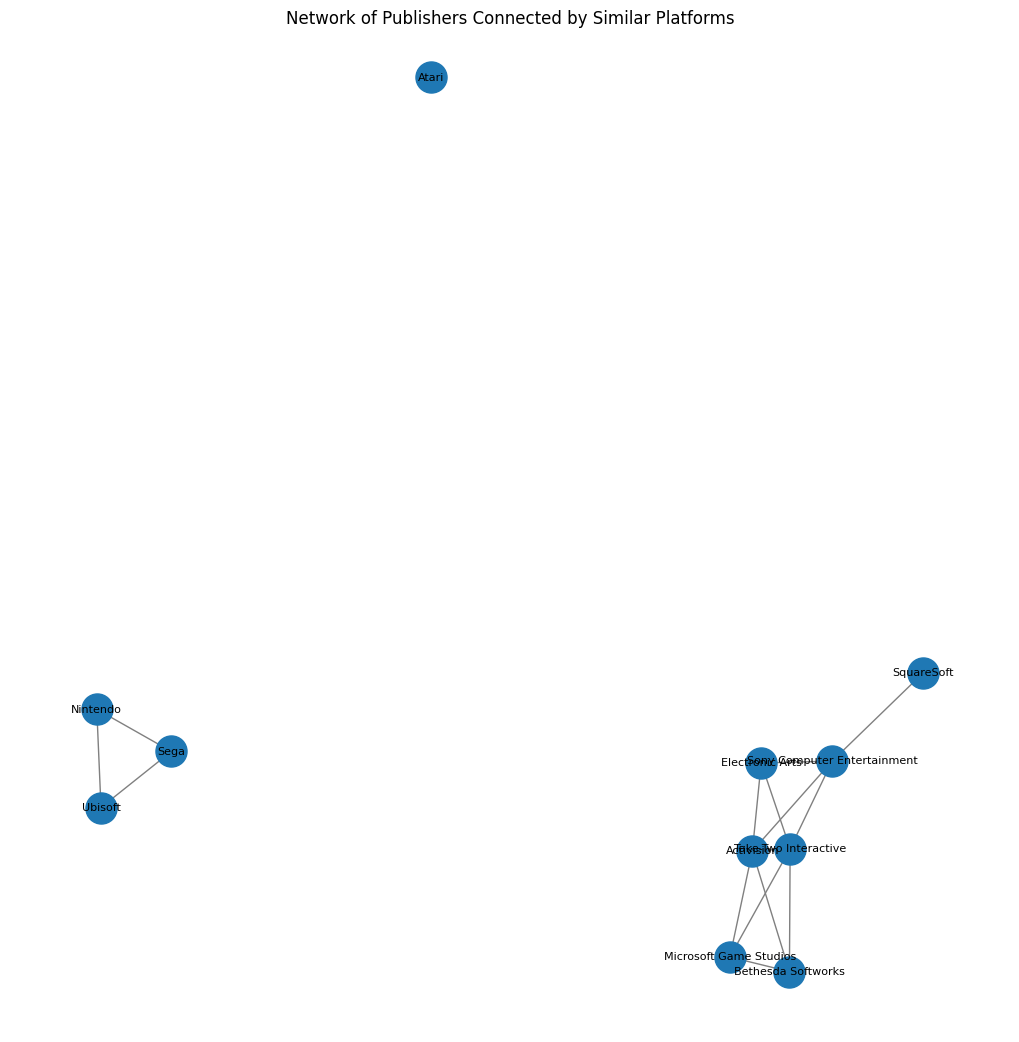

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
# Selecionando as 100 primeiras linhas para uma análise
#df = df.head(100)

# Filtragem e preparação dos dados
df_publishers = df[['Publisher', 'Platform']].dropna()

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós para cada publisher
publishers = df_publishers['Publisher'].unique()
print(publishers)
for publisher in publishers:
    G.add_node(publisher)

# Adicionar arestas com base em plataformas semelhantes
for platform in df_publishers['Platform'].unique():
    platform_publishers = df_publishers[df_publishers['Platform'] == platform]['Publisher'].unique()
    for i, pub_i in enumerate(platform_publishers):
        for j, pub_j in enumerate(platform_publishers):
            if i != j:
                if not G.has_edge(pub_i, pub_j):
                    G.add_edge(pub_i, pub_j, weight=1)
                else:
                    G[pub_i][pub_j]['weight'] += 1  # Aumenta o peso da conexão

# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, edge_color='gray')  # Mantém os names dos nós para visualização
plt.title("Network of Publishers Connected by Similar Platforms")
plt.show()


In [ ]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')



Nós da rede: ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft', 'Atari']
Number of nodes: 11
Arestas da rede: [('Nintendo', 'Ubisoft'), ('Nintendo', 'Sega'), ('Microsoft Game Studios', 'Take-Two Interactive'), ('Microsoft Game Studios', 'Activision'), ('Microsoft Game Studios', 'Bethesda Softworks'), ('Take-Two Interactive', 'Activision'), ('Take-Two Interactive', 'Bethesda Softworks'), ('Take-Two Interactive', 'Sony Computer Entertainment'), ('Take-Two Interactive', 'Electronic Arts'), ('Sony Computer Entertainment', 'Activision'), ('Sony Computer Entertainment', 'Electronic Arts'), ('Sony Computer Entertainment', 'SquareSoft'), ('Activision', 'Bethesda Softworks'), ('Activision', 'Electronic Arts'), ('Ubisoft', 'Sega')]
Number of edges: 15
Densidade da rede: 0.2727272727272727


Desenvolvedores únicos no dataset:
Sledgehammer Games
343 Industries
Rockstar North
EA Vancouver
Infinity Ward
Hudson
SquareSoft
Treyarch
Entertainment Analysis & Development Division
Good Science Studio
EA Sports
Hudson Soft
Nintendo EAD Tokyo
Rockstar Leeds
Bungie
Retro Studios
The Sims Studio
Polyphony Digital
Electronic Arts
Bethesda Game Studios
DMA Design
Ubisoft
Game Freak
Game Arts
Nintendo
Nd Cube
Bungie Software
Número de desenvolvedores: 27


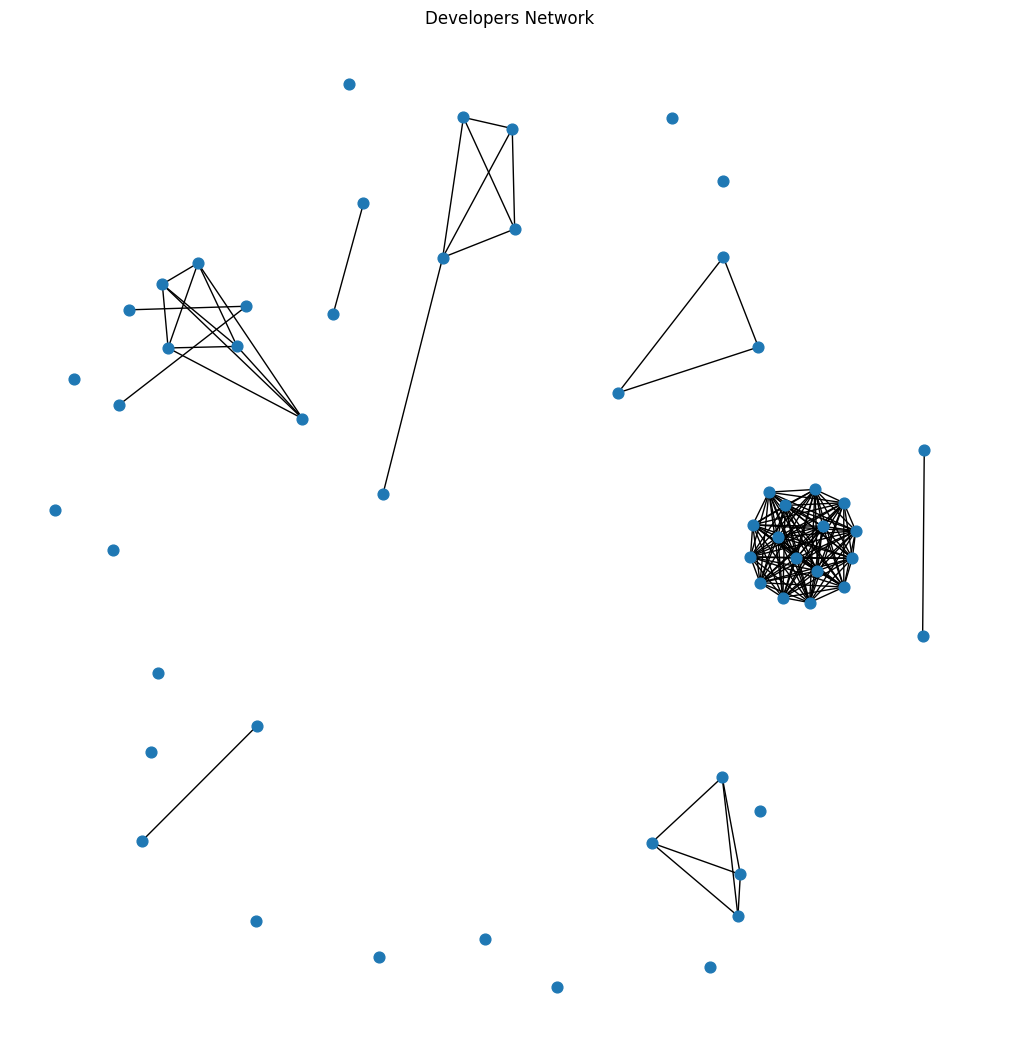

Número de componentes: 23
Componente 1:
Quantidade de jogos: 16
Jogos no componente: Wii Sports, Mario Kart Wii, Mario Kart DS, Wii Fit Plus, Brain Age 2: More Training in Minutes a Day, Animal Crossing: New Leaf, New Super Mario Bros. 2, Super Mario 3D Land, Wii Sports Resort, New Super Mario Bros. Wii, Wii Fit, New Super Mario Bros., Animal Crossing: Wild World, Super Mario Galaxy, Wii Play, Brain Age: Train Your Brain in Minutes a Day

Componente 2:
Quantidade de jogos: 1
Jogos no componente: Kinect Adventures!

Componente 3:
Quantidade de jogos: 4
Jogos no componente: Grand Theft Auto IV, Grand Theft Auto: San Andreas, Grand Theft Auto: Vice City, Grand Theft Auto V

Componente 4:
Quantidade de jogos: 5
Jogos no componente: Gran Turismo 2, Gran Turismo 4, Gran Turismo, Gran Turismo 5, Gran Turismo 3: A-Spec

Componente 5:
Quantidade de jogos: 5
Jogos no componente: Call of Duty 4: Modern Warfare, Call of Duty: Modern Warfare 2, Call of Duty: Ghosts, Call of Duty: Advanced Warfare, 

In [10]:
#----------------MONTANDO REDE COM OS DESENVOLVEDORES DOS GAMES----------------

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero

df_developer = df[['Name', 'Developer']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_developers = set()

# Adicionar gêneros ao conjunto
for developers in df_developer['Developer'].str.split(','):
    developers = [developer.strip() for developer in developers]  # Remover espaços em branco
    unique_developers.update(developers)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Desenvolvedores únicos no dataset:")
for developer in unique_developers:
    print(developer)

number_developers = len(unique_developers)
print(f'Número de desenvolvedores: {number_developers}')


# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos desenvolvedores
for _, row in df_developer.iterrows():
    game = row['Name']
    developers = [developer.strip() for developer in row['Developer'].split(',')]  # Dividir múltiplos desenvolvedores
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, developers=developers)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um desenvolvedor
    for developer in developers:
        for other_game, other_row in df_developer.iterrows():
            if game != other_row['Name'] and developer in [dev.strip() for dev in other_row['Developer'].split(',')]:
                G.add_edge(game, other_row['Name'], developer=developer)

            
# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Developers Network")
plt.show()

#Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

# Printar os nomes dos componentes e a quantidade de nós que cada um possui
components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    print(f"Quantidade de jogos: {len(component)}")
    print(f"Jogos no componente: {', '.join(component)}\n")

In [8]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')

Nós da rede: ['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Mario Kart DS', 'Wii Fit', 'Wii Fit Plus', 'Brain Age: Train Your Brain in Minutes a Day', 'Brain Age 2: More Training in Minutes a Day', 'Animal Crossing: Wild World', 'Super Mario Galaxy', 'Super Mario 3D Land', 'New Super Mario Bros. 2', 'Animal Crossing: New Leaf', 'Kinect Adventures!', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Grand Theft Auto: Vice City', 'Grand Theft Auto IV', 'Gran Turismo 3: A-Spec', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Gran Turismo 2', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Modern Warfare 2', 'Call of Duty: Ghosts', 'Call of Duty 4: Modern Warfare', 'Call of Duty: Advanced Warfare', 'Call of Duty: Black Ops', 'Call of Duty: Black Ops II', 'Grand Theft Auto III', 'Super Smash Bros. Brawl', 'Mario Kart 7', 'Halo 3', 'Halo 2', 'Halo: Reach', 'Just Dance 3', 'Just Dance 2', 'Final Fantasy VII

Total de vendas em cada região:
NA_Sales: 700.29
EU_Sales: 422.45
JP_Sales: 204.79
Other_Sales: 131.36

Correlações entre as regiões:
Correlação entre NA_Sales e EU_Sales: 0.56
Correlação entre NA_Sales e JP_Sales: 0.26
Correlação entre NA_Sales e Other_Sales: 0.36
Correlação entre EU_Sales e JP_Sales: 0.25
Correlação entre EU_Sales e Other_Sales: 0.50
Correlação entre JP_Sales e Other_Sales: -0.04

Densidade do grafo: 0.3333

Número de componentes: 2


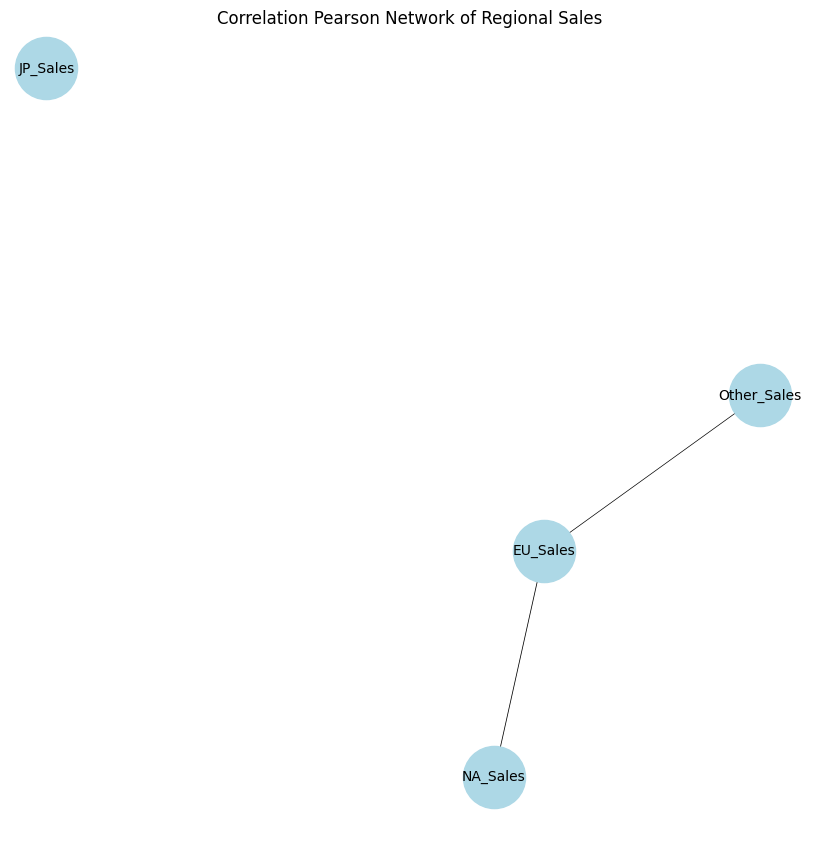

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

# Mantém apenas as colunas de interesse: Vendas Regionais
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].dropna()

# Calcular e exibir a quantidade total de vendas em cada região
total_sales = df_sales.sum()
print("Total de vendas em cada região:")
for region, total in total_sales.items():
    print(f"{region}: {total:.2f}")

# Inicializando o grafo vazio
G = nx.Graph()

# Adicionar nós para cada região
regions = df_sales.columns.tolist()
G.add_nodes_from(regions)

# Dicionário para armazenar as correlações
correlation_results = {}

# Calculando a correlação de Pearson entre as regiões e adicionando as arestas
for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        correlation, _ = pearsonr(df_sales[region1], df_sales[region2])
        
        # Armazenar o resultado da correlação
        correlation_results[(region1, region2)] = correlation
        
        # Considera uma correlação forte se for maior que 0.5
        if abs(correlation) > 0.5:
            G.add_edge(region1, region2, weight=correlation)

# Exibir os resultados das correlações
print("\nCorrelações entre as regiões:")
for pair, corr_value in correlation_results.items():
    print(f"Correlação entre {pair[0]} e {pair[1]}: {corr_value:.2f}")

# Calcular a densidade do grafo
density = nx.density(G)
print(f'\nDensidade do grafo: {density:.4f}')

# Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'\nNúmero de componentes: {number_communities}')

# Desenhando o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(8, 8))

# A cor e espessura das arestas indicam a força da correlação
edges = G.edges(data=True)
weights = [abs(data['weight']) for _, _, data in edges]
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, width=weights)

plt.title("Correlation Pearson Network of Regional Sales")
plt.show()


ANÁLISE COM OS VALORES DE CRITICAS DO SITE DO METACRITIC


Análise Descritiva para a rede "Rede de Jogos - Critic Score":
Número de nós: 108
Número de arestas: 104
Densidade da rede: 0.0180
Distribuição de graus: {0: 10, 1: 44, 2: 21, 3: 19, 4: 7, 7: 1, 5: 6} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - Critic Score":
Número de comunidades: 38
Spreading (coeficiente de assortatividade): 0.6185
Centralidade (closeness): {'Call of Duty: Black Ops': 0.08411214953271028, 73: 0.06783237865541152, 81: 0.06783237865541152, 91: 0.06783237865541152, 29: 0.06783237865541152}
Centralidade (betweenness): {'Call of Duty: Black Ops': 0.009971786281079174, 66: 0.0029977076353376827, 8: 0.0029977076353376827, 73: 0.001413624875095515, 81: 0.001413624875095515}


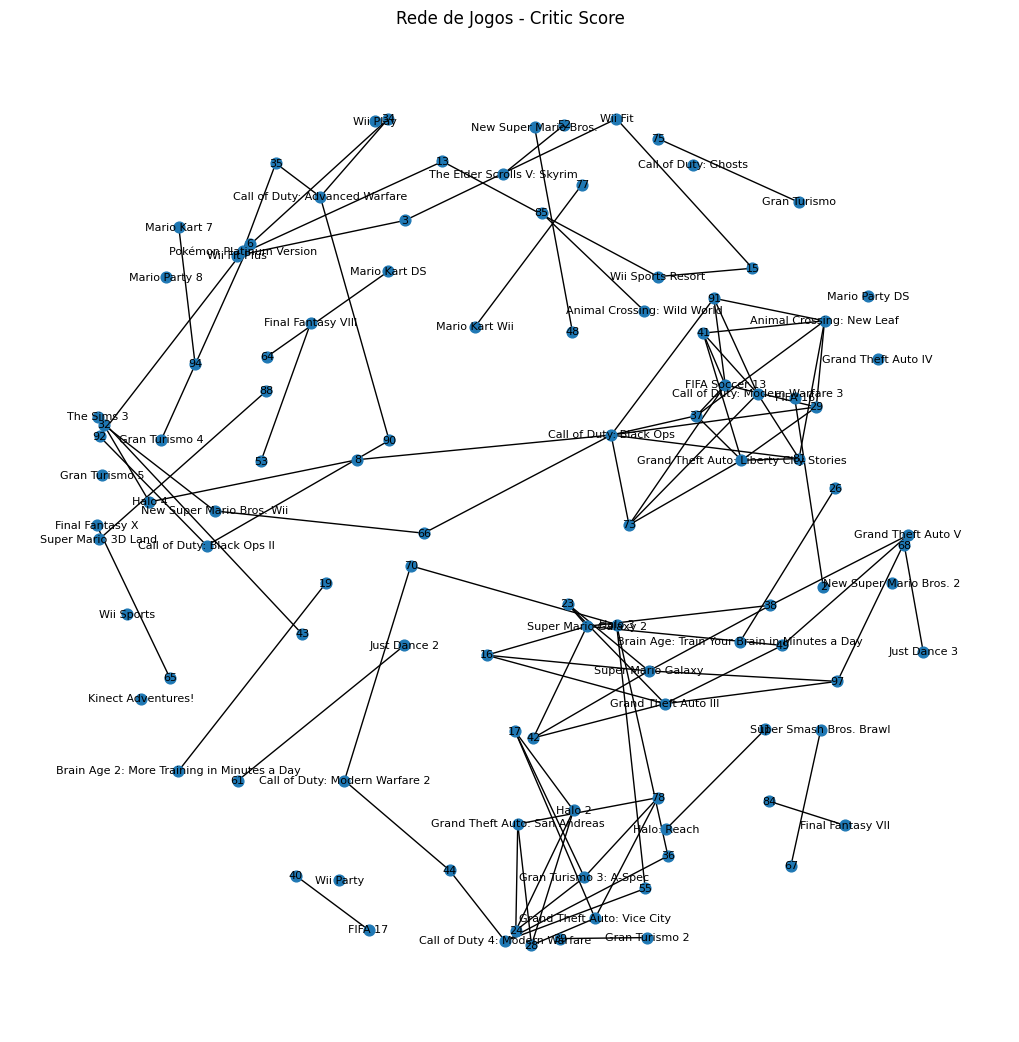

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 100 primeiras linhas para uma análise
df = df.head(100)

# Filtragem e preparação dos dados
df_critic_score = df[['Name', 'Critic_Score']].dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
    print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos Critic_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['Critic_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um Critic_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['Critic_Score']) - float(other_row['Critic_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar uma única rede com todos os jogos
build_and_analyze_network(df_critic_score, "Rede de Jogos - Critic Score")




Análise Descritiva para a rede "Rede de Jogos - User Score":
Número de nós: 116
Número de arestas: 1031
Densidade da rede: 0.1546
Distribuição de graus: {27: 6, 24: 6, 25: 12, 26: 13, 18: 4, 28: 9, 22: 3, 17: 7, 16: 6, 21: 4, 9: 4, 5: 6, 11: 2, 7: 4, 12: 2, 20: 1, 15: 2, 10: 4, 13: 2, 30: 3, 0: 2, 6: 2, 3: 1, 1: 5, 19: 3, 2: 3}
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - User Score":
Número de comunidades: 5
Spreading (coeficiente de assortatividade): 0.6357
Centralidade (closeness): {'Grand Theft Auto IV': 0.42175862741275105, 16: 0.41616006156213925, 40: 0.41616006156213925, 78: 0.41616006156213925, 'Grand Theft Auto V': 0.4107081830263907}
Centralidade (betweenness): {'Grand Theft Auto IV': 0.09971703044224674, 26: 0.06539572106945618, 'Brain Age 2: More Training in Minutes a Day': 0.052523268359714485, 66: 0.049588778775939875, 'Wii Play': 0.04523943483930574}


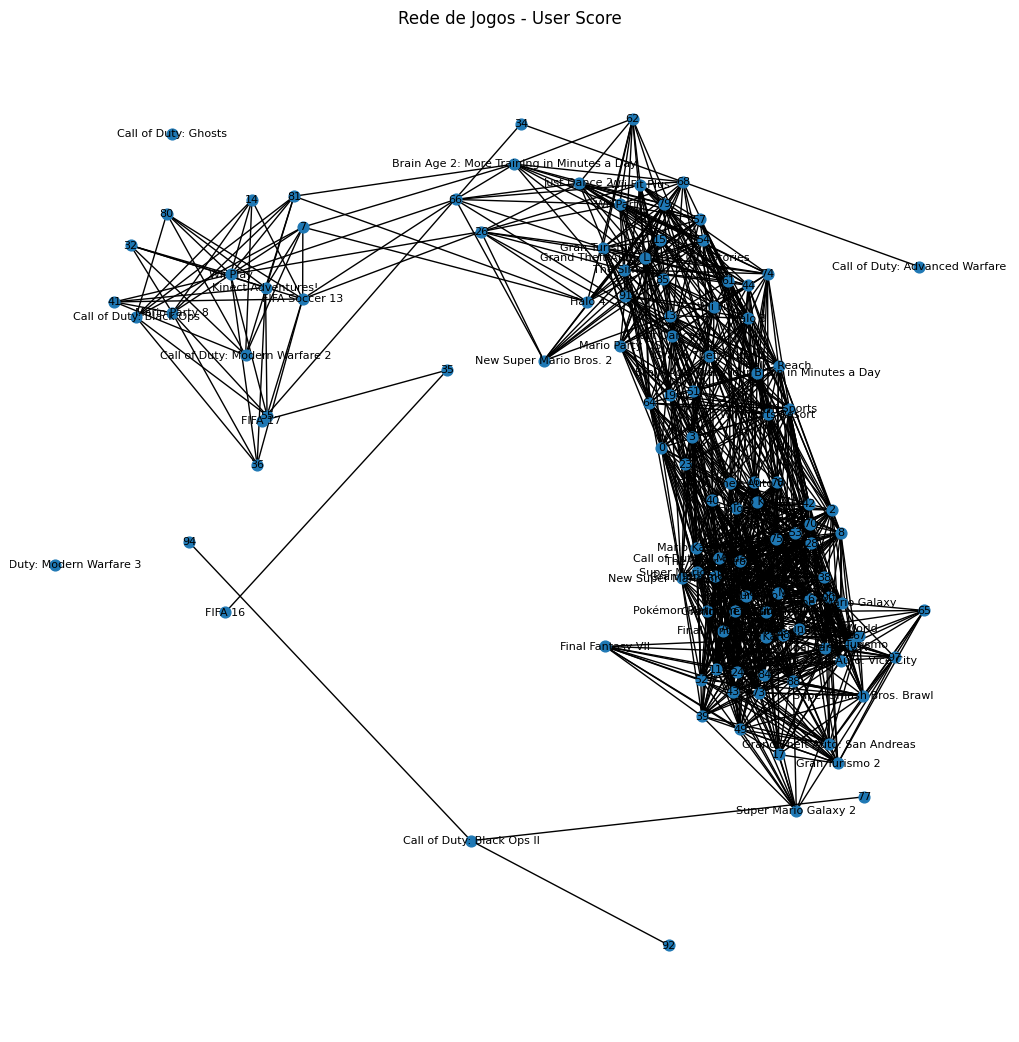

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 100 primeiras linhas para uma análise
df = df.head(100)

# Filtragem e preparação dos dados
df_user_score = df[['Name', 'User_Score']].dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution}')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
    print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos User_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['User_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um User_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['User_Score']) - float(other_row['User_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar uma única rede com todos os jogos
build_and_analyze_network(df_user_score, "Rede de Jogos - User Score")

